In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import sys
sys.path.insert(0, '/content/drive/MyDrive/Colab Notebooks/ASRGAN')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install tensorlayer>=2.0.0

## Import necessary libraries

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import importlib
import cv2
import scipy
from itertools import chain
from sklearn.metrics import r2_score
from skimage import feature
from matplotlib.colors import ListedColormap
from mpl_toolkits.axes_grid1 import make_axes_locatable
from PIL import Image

from open_data import open_data
from SSIM_func import SSIM_func
from psnr_func import psnr_func
from r_squared import r_squared
from model import get_G
from visualize_utils import create_cmap,compare_pred, import_model,cm_to_inch, load_G 

## Import training set, test set and the generator model

In [8]:
# Import trainin gset , test set and pre-trained generator model (ASRGAN or SRGAN) 

trainLr = open_data('/content/drive/MyDrive/Colab Notebooks/ASRGAN/datasets/trainLr.pkl')
trainHr = open_data('/content/drive/MyDrive/Colab Notebooks/ASRGAN/datasets/trainHr.pkl')
validLr= open_data('/content/drive/MyDrive/Colab Notebooks/ASRGAN/datasets/validLr.pkl')  
validHr = open_data('/content/drive/MyDrive/Colab Notebooks/ASRGAN/datasets/validHr.pkl')

model_path = '/content/drive/MyDrive/Colab Notebooks/ASRGAN/models/ASRGAN_G.h5'   #  Help : we have to super resolution models including SRGAN_G.h5 or ASRGAN_G.h5
G = load_G(model_path)


## Benchmarking the generated images in "training set"


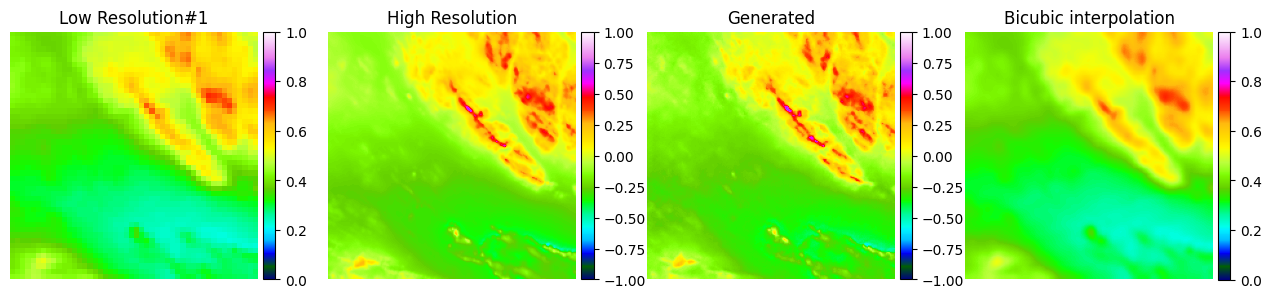

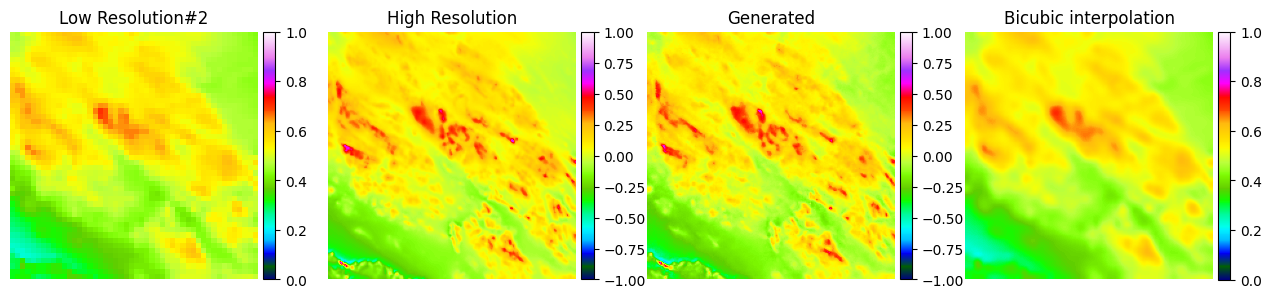

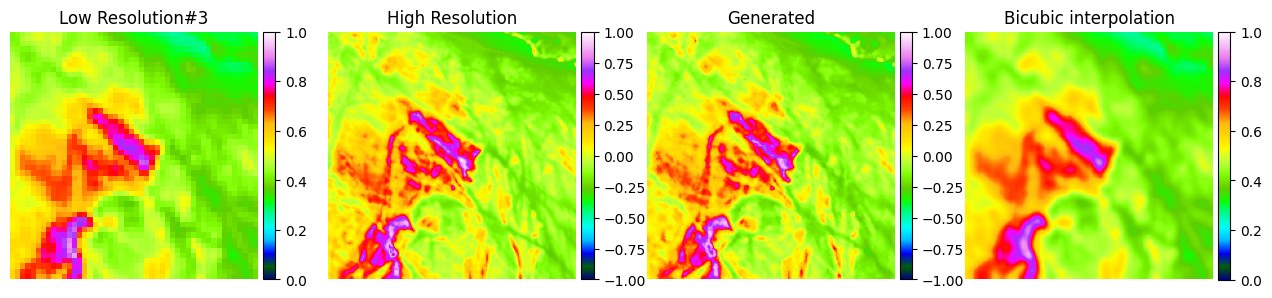

In [ ]:
for i in range(3):
  compare_pred(trainLr[i], trainHr[i], G, name = i , save= False, cmap = 'gist_ncar', tile_number=i+1)

## Benchmarking the generated images in "test set"


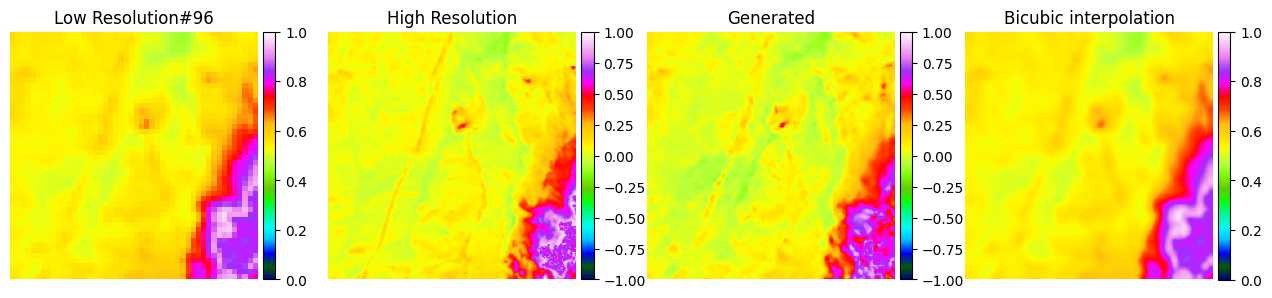

In [ ]:
for i in range(95,96,1):  

    compare_pred(validLr[i], validHr[i], G, name = i , save= False, cmap = 'gist_ncar', tile_number=i+1)

## Calculation of R-squared between HR and generated image


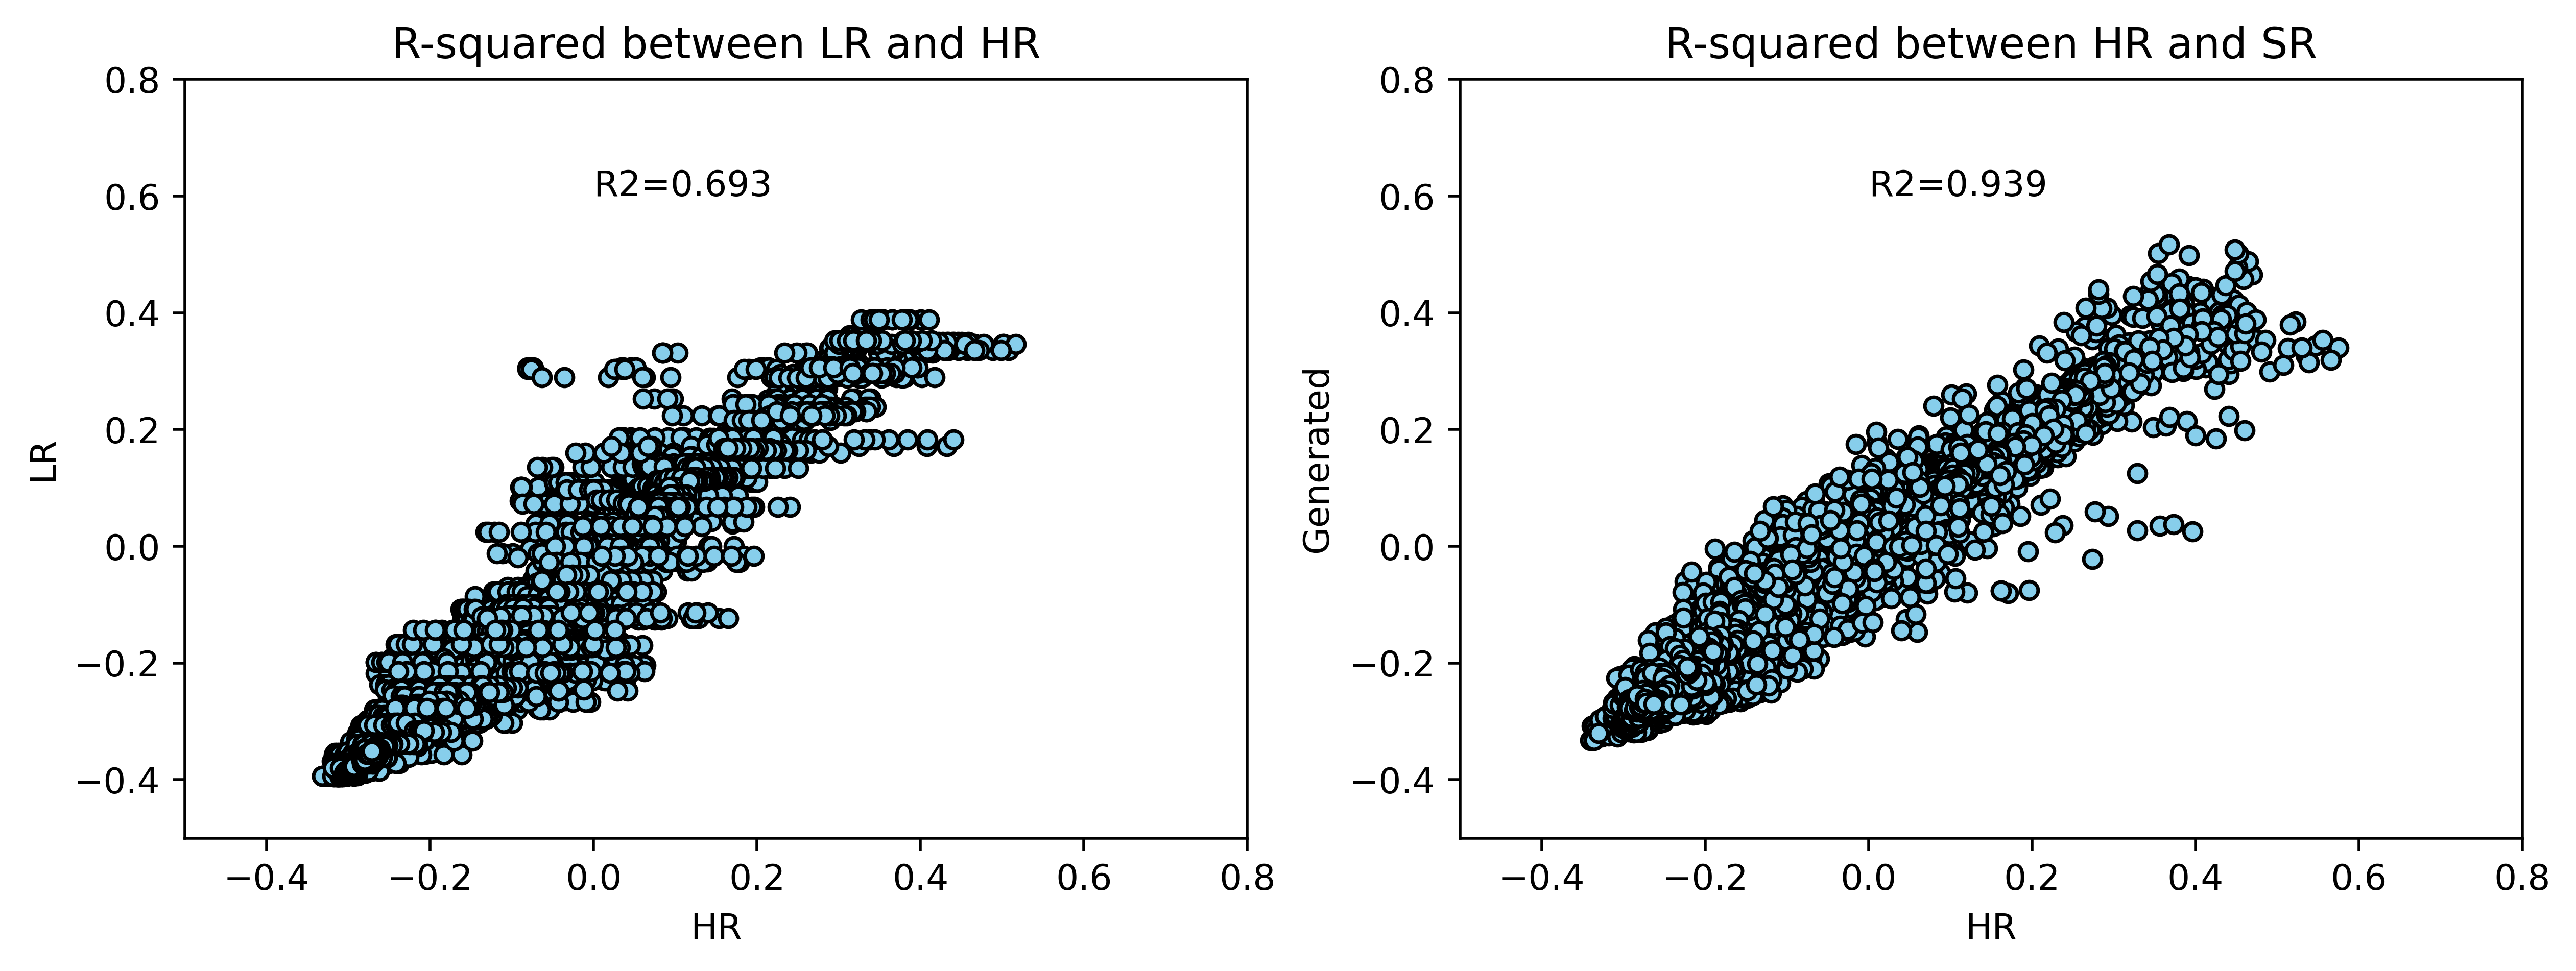

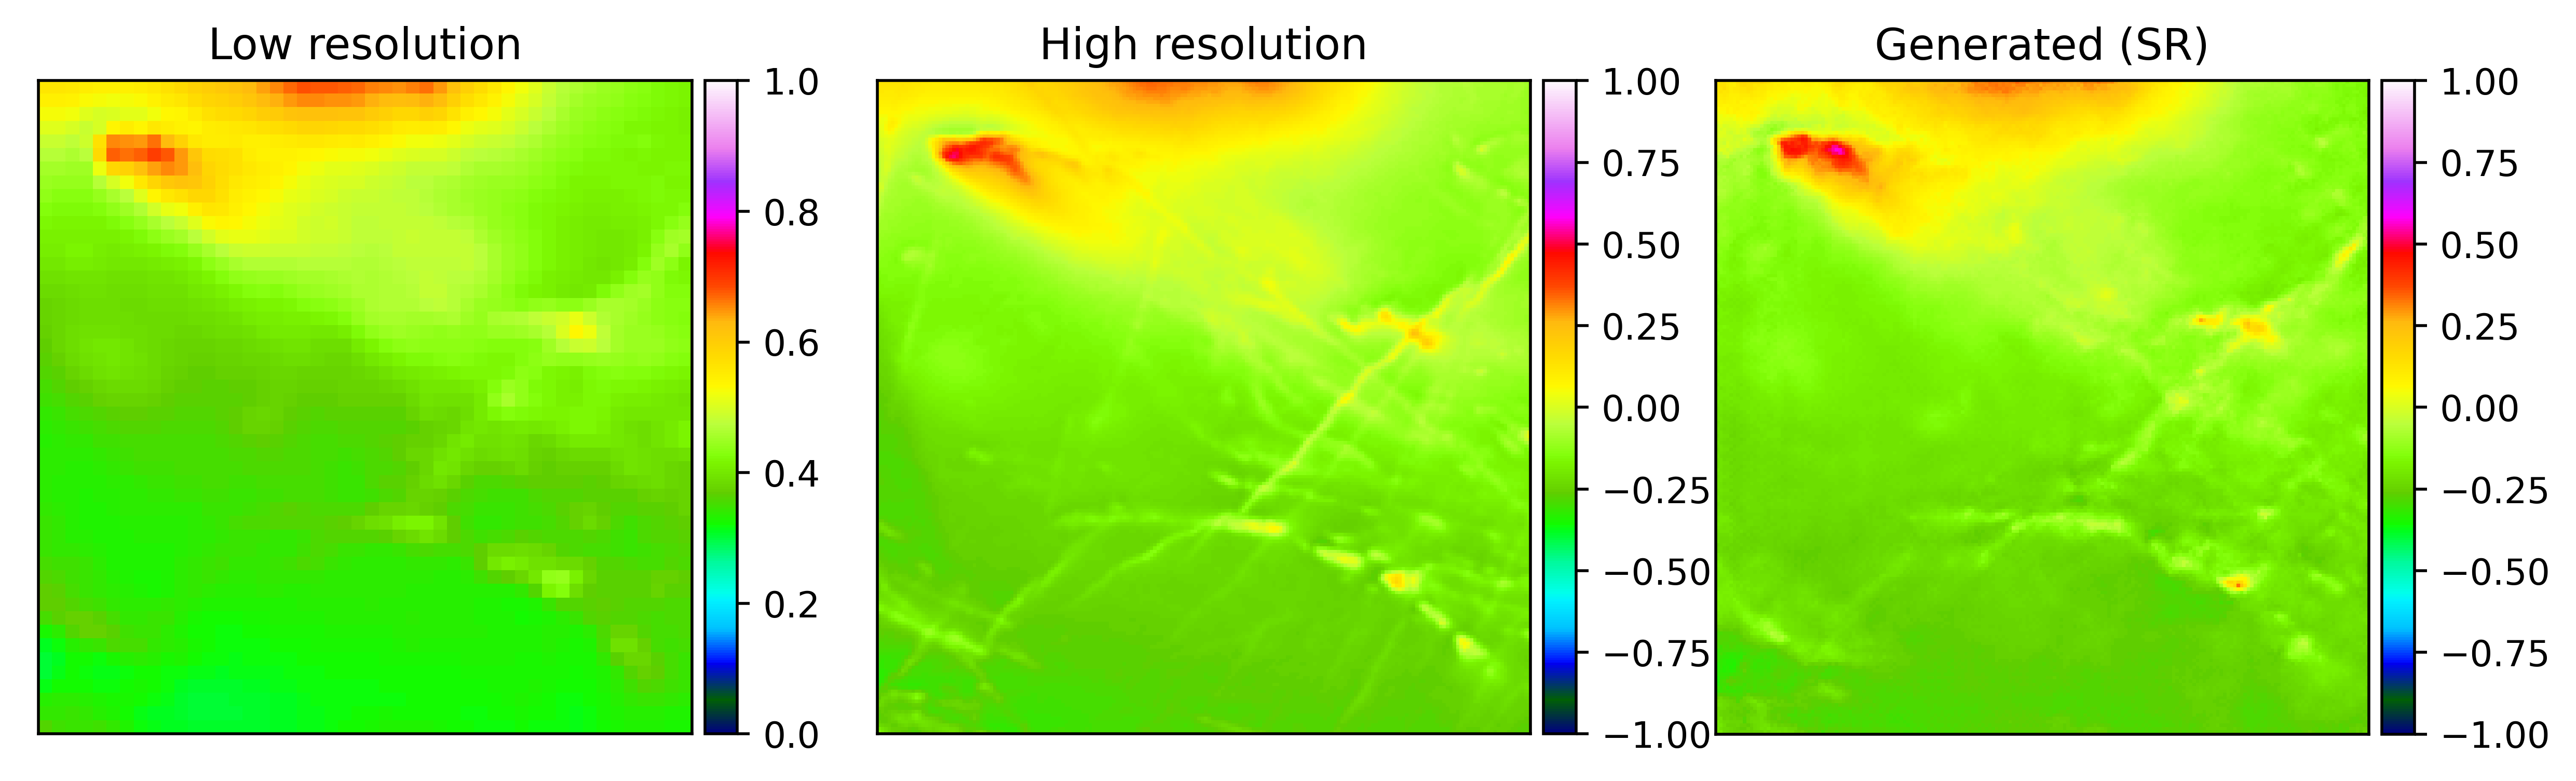

R-squard max between low resolution and high resolution is:0.9054916573117852
R-squared mean between low resolution and high resolution is:0.4447220651285603
R-squard max between high resolution and generated (SR) is:0.9560390560709938
R-squared mean between high resolution and generated (SR) is:0.5611891729106094


In [ ]:
r_squared_lr_hr, r_squared_sr_hr, images_sr = r_squared (validLr,validHr, G)

## Calculation of the stractural similarilty Index between HR and generated (SR)

In [ ]:
images_bicubic, ssim_hr_sr, ssim_hr_bicubic = SSIM_func(validLr, validHr, images_sr)

Maximum ssim between high resolution and bicubic is : 0.8403160572052002
Mean ssim between high resolution and bicubic is : 0.5627508163452148
Maximum ssim between high resolution and generated (SR) is : 0.9141732454299927
Mean ssim between high resolution and generated (SR) is : 0.6433144807815552


## function for calculating psnr (peak signal to noise ratio )

In [ ]:
psnr_hr_sr, psnr_hr_bicubic = psnr_func(validHr, validLr, images_sr, images_bicubic)

psnr max between hr-sr is:30.96516256773606
psnr mean between hr-sr is:23.879993403003013
psnr max between hr-Bicubic is:30.97146417847606
psnr mean between hr-Bicubic is:23.653721291567066
